# KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_train = pd.read_pickle('X_train.pkl')
X_valid = pd.read_pickle('X_valid.pkl')

y_train = pd.read_pickle('y_train.pkl')
y_valid = pd.read_pickle('y_valid.pkl')
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.657186,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## RobustScaler

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [6]:
scaler = RobustScaler()

In [7]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

In [8]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.657186,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

## KNN

In [10]:
k_vals = np.arange(2, 10)

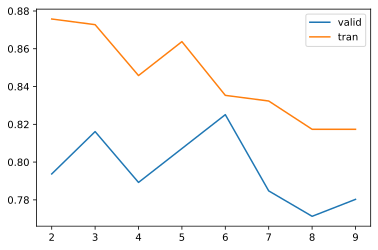

In [11]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.legend(['valid', 'tran']);

In [12]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8251121076233184

### Точность и полнота

In [13]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]])

In [15]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

123

In [16]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

28

In [17]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

11

In [18]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

61

In [19]:
Precision = TP / (TP + FP)
Precision

0.8472222222222222

In [20]:
from sklearn.metrics import precision_score

In [21]:
precision_score(y_valid, y_pred)

0.8472222222222222

### Полноста

In [22]:
Recall = TP / (TP + FN)
Recall

0.6853932584269663

In [23]:
from sklearn.metrics import recall_score

In [24]:
recall_score(y_valid, y_pred)

0.6853932584269663

### F1 score

In [25]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.7577639751552795

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_valid, y_pred)

0.7577639751552795

### Метрика AUC

In [28]:
y_pred_proba = clf.predict_proba(X_valid)

In [29]:
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [30]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.83333333, 0.        , 0.16666667,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.16666667,
       0.33333333, 0.5       , 0.83333333, 0.5       , 0.        ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.66666667,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.        , 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.     

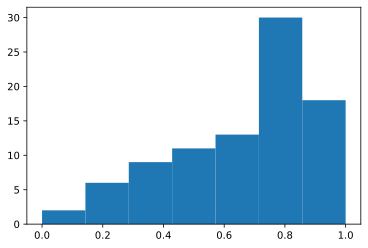

In [42]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7);

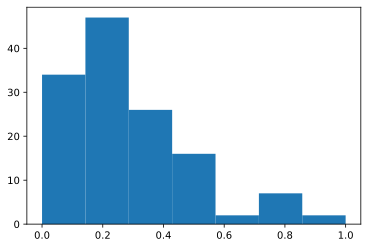

In [41]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7);

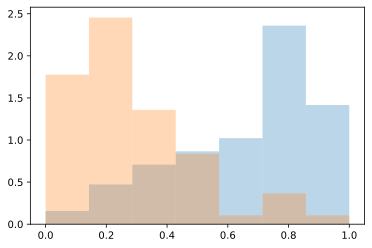

In [39]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7, density=True, alpha=0.3)
plt.hist(y_pred_proba[y_valid == 0], bins = 7, density=True, alpha=0.3);

In [35]:
from sklearn.metrics import roc_curve

In [36]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label = 1)

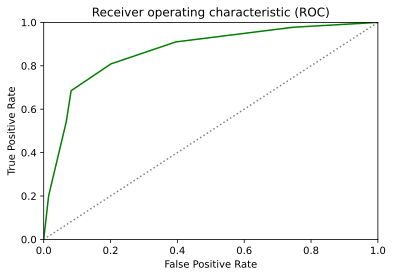

In [38]:
plt.plot(fpr, tpr, c='green', label='ROC curve')
plt.plot([0,1], [0,1], c='grey', linestyle=':')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)');